In [1]:
#pip install statsmodels

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st 

In [6]:
years = [2015,2016,2017,2018,2019]
df={}
# Looping through years list
for year in years:
    # File to Load 
    file = f"UWA-Project/Resources/{year}.csv" 

   # Read each years File and store into Pandas data frame
    df[year] = pd.read_csv(file)

df_concat = pd.read_csv("UWA-Project/Output_C/happiness_concat.csv")

# Assigning names to each item in the list of data frames
df_2015,df_2016,df_2017,df_2018,df_2019 = df[2015],df[2016],df[2017],df[2018],df[2019]

In [7]:
df_2015

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
# Creating a dataframe with only Records of top 10 ranks in each year
top_10_2015 = df_2015.loc[df_2015["Happiness_Rank"] <= 10, :]
top_10_2016 = df_2016.loc[df_2016["Happiness_Rank"] <= 10, :]
top_10_2017 = df_2017.loc[df_2017["Happiness_Rank"] <= 10, :]
top_10_2018 = df_2018.loc[df_2018["Happiness_Rank"] <= 10, :]
top_10_2019 = df_2019.loc[df_2018["Happiness_Rank"] <= 10, :]

In [9]:
# Create a List and store the Australia scores and Top 10 minimum scores of each year
year_count = [2015, 2016, 2017, 2018, 2019]
au_scores = []
min_happ_score = []
au_scores.append(top_10_2015.iloc[9, 2])
au_scores.append(top_10_2016.iloc[8, 2])
au_scores.append(top_10_2017.iloc[9, 2])
au_scores.append(top_10_2018.iloc[9, 2])
au_scores.append(df_2019.iloc[10, 2])
min_happ_score.append(top_10_2015["Happiness_Score"].min())
min_happ_score.append(top_10_2016["Happiness_Score"].min())
min_happ_score.append(top_10_2017["Happiness_Score"].min())
min_happ_score.append(top_10_2018["Happiness_Score"].min())
min_happ_score.append(top_10_2019["Happiness_Score"].min())

# Create a DataFrame for the data
au_pd = pd.DataFrame({"Year": year_count,
                     "AU_Happiness_Score": au_scores,
                     "Top_10_score": min_happ_score})

In [10]:
au_pd

,Year,AU_Happiness_Score,Top_10_score
0,2015,7.284,7.284
1,2016,7.313,7.291
2,2017,7.284,7.284
3,2018,7.272,7.272
4,2019,7.228,7.246


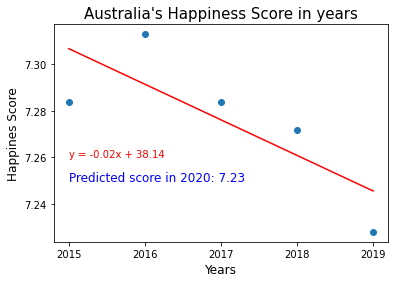

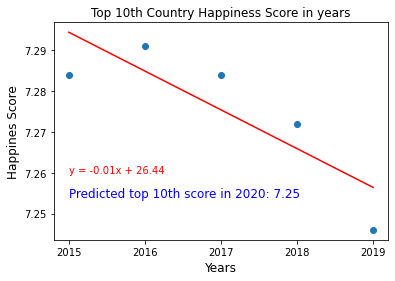

In [11]:
# Australia linear equation & prediction score in 2020
x_values = au_pd["Year"]
y_values = au_pd["AU_Happiness_Score"]
au_2020 = 2020
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
au_predicted_score = round(slope * au_2020 + intercept,2)
plt.annotate(line_eq,(2015, 7.26),fontsize=10,color="red")  
plt.annotate(f"Predicted score in 2020: {au_predicted_score}", (2015, 7.25), fontsize=12, color="blue")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Happines Score", fontsize = 12)
plt.title("Australia's Happiness Score in years", fontsize = 15)
plt.show()


# Top 10 minimum score linear equation & prediction score in 2020
x_values = au_pd["Year"]
y_values = au_pd["Top_10_score"]
top_10_2020 = 2020
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
top_10_predicted_score = round(slope * top_10_2020 + intercept,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(2015, 7.26),fontsize=10,color="red")
plt.annotate(f"Predicted top 10th score in 2020: {top_10_predicted_score}", (2015, 7.254), fontsize=12, color="blue")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Happines Score", fontsize = 12)
plt.title("Top 10th Country Happiness Score in years")
plt.show()

In [33]:
# Australia linear equation & prediction score in 2020 using plotly
x_axis = au_pd["Year"]
y_axis = au_pd["AU_Happiness_Score"]
au_2020 = 2020
slope, intercept, r_value, p_value, std_err = st.linregress(x_axis, y_axis)
au_predicted_score = round(slope * au_2020 + intercept,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig = px.scatter(au_pd, x = "Year", y = "AU_Happiness_Score", opacity=1, 
    trendline = "ols", trendline_color_override = "red")
fig.update_xaxes(nticks=5)
fig.update_layout(height=400, title_text = "Australia's Happiness Score in years",
                annotations = [dict(x = 2016, y = 7.26, text = line_eq, font_size = 20, font_color = "red",
                              showarrow = False), 
                              dict(x = 2016, y = 7.25, text = f"r value is:: {round(r_value, 2)}",
                              font_size = 20, font_color = "black", showarrow = False), 
                              dict(x = 2016, y = 7.24, text = f"r^2 value is:: {round(r_value**2, 2)}",
                              font_size = 20, font_color = "green", showarrow = False),  
                              dict(x = 2016, y = 7.23, text = f"Predicted score in 2020: {au_predicted_score}", 
                              font_size = 20, font_color = "blue", showarrow = False)
                              ])
fig.show()


# Top 10 minimum score linear equation & prediction score in 2020 using plotly
x_axis = au_pd["Year"]
y_axis = au_pd["Top_10_score"]
top_10_2020 = 2020
slope, intercept, r_value, p_value, std_err = st.linregress(x_axis, y_axis)
top_10_predicted_score = round(slope * top_10_2020 + intercept,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig = px.scatter(au_pd, x = "Year", y = "Top_10_score", opacity=1, 
    trendline = "ols", trendline_color_override = "red")
fig.update_xaxes(nticks=5)
fig.update_layout(height=400, title_text = "Top 10th Country Happiness Score in years",
                annotations = [dict(x = 2016, y = 7.265, text = line_eq, font_size = 20, font_color = "red",
                              showarrow = False), 
                              dict(x = 2016, y = 7.26, text = f"r value is:: {round(r_value, 2)}",
                              font_size = 20, font_color = "black", showarrow = False), 
                              dict(x = 2016, y = 7.255, text = f"r^2 value is:: {round(r_value**2, 2)}",
                              font_size = 20, font_color = "green", showarrow = False),   
                              dict(x = 2016, y = 7.25,
                              text = f"Predicted top 10th score in 2020: {top_10_predicted_score}",
                              font_size = 20, font_color = "blue", showarrow = False)])

fig.show()
